### 1) Overall configurations

In [1]:
import sys

import pandas as pd
sys.path.append( '../slevelsutil/' )

import request_track_util as rtrack
from Instance import Instance
from Filter import Filter
from ResultTripServiceLevel import ResultTripServiceLevel

### 2) Loading the instance data

In [2]:
test_case = "standard_vs_enforce_BB"
# TRC Paper (Tight execution cuts)
# instance_settings_path = "C:/Users/LocalAdmin/IdeaProjects/slevels/src/main/resources/week/enforce_service_levels.json"
# data_dict_path = "../data/dictionary/request_track_data_dictionary.json"
# test_label = "standard"

# TRC Paper (Flexible execution cuts)
instance_settings_path = "C:/Users/LocalAdmin/IdeaProjects/slevels/src/main/resources/day/enforce_sl_all_hierachical_scenarios_150_plus.json"
data_dict_path = "../data/dictionary/request_track_data_dictionary_plus.json"
test_label = "time_plus"

instance = Instance(test_case, instance_settings_path, data_dict_path)
tripdata = ResultTripServiceLevel(instance)

In [3]:
figure_name_violated_stack = f"grid_stack_sl_violated_{test_label}.pdf"
figure_name_violated_stack_filepath = f'{instance.paper_folder}{test_case}_{figure_name_violated_stack}'

In [4]:
tripdata.df_not_serviced

,Pickup waiting (min),SQ Class,Service,Pickup deadline,Policy,deviation
1053,412,Standard,Company,Violated,Enforce SL + Hire,112
1287,389,Standard,Company,Violated,Enforce SL + Hire,89
1291,372,Standard,Company,Violated,Enforce SL + Hire,72
1301,412,Standard,Company,Violated,Enforce SL + Hire,112
1400,398,Standard,Company,Violated,Enforce SL + Hire,98
...,...,...,...,...,...,...
14206,359,Standard,Company,Violated,Min. waiting,59
14212,202,Business,Company,Violated,Min. waiting,22
14219,219,Business,Company,Violated,Min. waiting,39
14227,369,Standard,Company,Violated,Min. waiting,69


In [5]:
tripdata.not_serviced_count

,SQ Class,Policy,Service,count
0,Business,Enforce SL,Company,222
1,Business,Enforce SL,Denied,34
2,Business,Enforce SL + Hire,Company,85
3,Business,Min. waiting,Company,1687
4,Low-cost,Enforce SL,Denied,52
5,Low-cost,Min. waiting,Denied,317
6,Standard,Enforce SL,Company,1547
7,Standard,Enforce SL,Denied,176
8,Standard,Enforce SL + Hire,Company,544
9,Standard,Min. waiting,Company,4039


In [6]:
df_denied_total_violation = tripdata.not_serviced_with_subtotal.copy()
df_denied_total_violation

,SQ Class,Policy,Service,count
0,Business,Enforce SL,Company,222
1,Business,Enforce SL,Denied,34
2,Business,Enforce SL,Total,256
3,Business,Enforce SL + Hire,Company,85
4,Business,Enforce SL + Hire,Total,85
5,Business,Min. waiting,Company,1687
6,Business,Min. waiting,Total,1687
7,Low-cost,Enforce SL,Denied,52
8,Low-cost,Enforce SL,Total,52
9,Low-cost,Min. waiting,Denied,317


In [7]:
# Removing violated (but serviced) to simulate stacked bars
filter_violated = Filter(df_denied_total_violation, instance)
df_rejected_and_total_violated = df_denied_total_violation[~filter_violated.serviced].copy()

# Sorting data to put total violation bar in the background
category_segmentation = pd.api.types.CategoricalDtype(
    categories=["Total", "Denied"],
    ordered=True
)
df_rejected_and_total_violated[instance.headers["service"]] = df_rejected_and_total_violated[instance.headers["service"]].astype(category_segmentation)
legend_data={"Total":"Delayed", "Denied":"Rejected"}

df_rejected_and_total_violated

,SQ Class,Policy,Service,count
1,Business,Enforce SL,Denied,34
2,Business,Enforce SL,Total,256
4,Business,Enforce SL + Hire,Total,85
6,Business,Min. waiting,Total,1687
7,Low-cost,Enforce SL,Denied,52
8,Low-cost,Enforce SL,Total,52
9,Low-cost,Min. waiting,Denied,317
10,Low-cost,Min. waiting,Total,317
12,Standard,Enforce SL,Denied,176
13,Standard,Enforce SL,Total,1723


Example of creating dictionary indexed by tuple (class, method)

In [8]:
dict_class_method_count = tripdata.get_value_counts_dict(["class"], "method")
dict_class_method_count

{('Business', 'Enforce SL'): 2277,
 ('Business', 'Enforce SL + Hire'): 2277,
 ('Business', 'Min. waiting'): 2277,
 ('Low-cost', 'Enforce SL'): 2240,
 ('Low-cost', 'Enforce SL + Hire'): 2240,
 ('Low-cost', 'Min. waiting'): 2240,
 ('Standard', 'Enforce SL'): 9717,
 ('Standard', 'Enforce SL + Hire'): 9717,
 ('Standard', 'Min. waiting'): 9717}

Example of creating dictionary indexed by tuple (class, method)

In [9]:
dict_class_method_service_count = tripdata.get_value_counts_dict(["class", "method"], "service_level")
dict_class_method_service_count

{('Business', 'Enforce SL', 'Achieved'): 2021,
 ('Business', 'Enforce SL', 'Violated'): 256,
 ('Business', 'Enforce SL + Hire', 'Achieved'): 2192,
 ('Business', 'Enforce SL + Hire', 'Violated'): 85,
 ('Business', 'Min. waiting', 'Violated'): 1687,
 ('Business', 'Min. waiting', 'Achieved'): 590,
 ('Low-cost', 'Enforce SL', 'Achieved'): 2188,
 ('Low-cost', 'Enforce SL', 'Violated'): 52,
 ('Low-cost', 'Enforce SL + Hire', 'Achieved'): 2240,
 ('Low-cost', 'Min. waiting', 'Achieved'): 1923,
 ('Low-cost', 'Min. waiting', 'Violated'): 317,
 ('Standard', 'Enforce SL', 'Achieved'): 7994,
 ('Standard', 'Enforce SL', 'Violated'): 1723,
 ('Standard', 'Enforce SL + Hire', 'Achieved'): 9173,
 ('Standard', 'Enforce SL + Hire', 'Violated'): 544,
 ('Standard', 'Min. waiting', 'Achieved'): 5446,
 ('Standard', 'Min. waiting', 'Violated'): 4271}

In [10]:
df_rejected_and_total_violated

,SQ Class,Policy,Service,count
1,Business,Enforce SL,Denied,34
2,Business,Enforce SL,Total,256
4,Business,Enforce SL + Hire,Total,85
6,Business,Min. waiting,Total,1687
7,Low-cost,Enforce SL,Denied,52
8,Low-cost,Enforce SL,Total,52
9,Low-cost,Min. waiting,Denied,317
10,Low-cost,Min. waiting,Total,317
12,Standard,Enforce SL,Denied,176
13,Standard,Enforce SL,Total,1723


Business Enforce SL Total 256 2277 0.11242863416776461
Business Enforce SL + Hire Total 85 2277 0.03732981993851559
Business Min. waiting Total 1687 2277 0.7408871321914801
Standard Enforce SL Total 1723 9717 0.177318102294947
Standard Enforce SL + Hire Total 544 9717 0.05598435731192755
Standard Min. waiting Total 4271 9717 0.43953895235154883
Low-cost Enforce SL Total 52 2240 0.023214285714285715
Low-cost Min. waiting Total 317 2240 0.14151785714285714
saving at C:/Users/LocalAdmin/OneDrive/leap_forward/phd_project/sqc/business_class_amod/trc/standard_vs_enforce_BB_grid_stack_sl_violated.pdf


<Figure size 432x288 with 0 Axes>

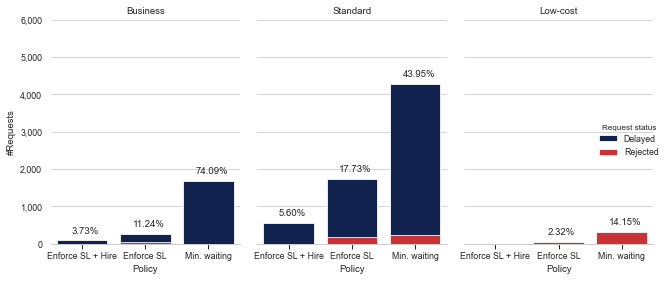

In [11]:
import seaborn as sns
sns.set_style(
    "whitegrid", {
        'xtick.bottom': True,
        'xtick.top': False,
        'ytick.left': False,
        'ytick.right': False
    }
)
sns.set_context("paper")
sns.despine(left=True)


import matplotlib.pyplot as plt
# flatui = ["#e74c3c", "#34495e"]
YlGnBu_r = ['#081d58', '#e31a1c', '#225ea8', '#1d91c0', '#7fcdbb', '#c7e9b4', '#ffffd9']
palette = sns.color_palette(YlGnBu_r)

g = sns.catplot(
    kind="bar",
    y="count",
    x=instance.headers["method"],
    hue=instance.headers["service"],
    col=instance.headers["class"],
    data=df_rejected_and_total_violated,
    col_order=instance.order_classes,
    order = instance.order_methods_dict.keys(),
    height=4,
    dodge=False,
    aspect=0.7,
    palette=palette
)


def plot_violated_tags(facet_axes, tag_kws):
    def violated_tags(*args, **kwargs):
        tuples  = list(zip(*[list(a) for a in args]))
        for sq_class, method, status, count in tuples:
            if status == "Total":
                x_index_method = instance.order_methods_dict[method]
                total = dict_class_method_count.get((sq_class, method), 0)
                value = count/total
                print(sq_class, method, status, count, total, value)
                label = f"{value:.2%}"
                x_pos = x_index_method-len(label)/30
                plt.text(x_pos, count+200, label)

    facet_axes = (facet_axes.map(
        violated_tags,
        instance.headers["class"],
        instance.headers["method"],
        instance.headers["service"],
        "count",
        **tag_kws)
    )

    return facet_axes


for i, (old_label, new_label) in enumerate(legend_data.items()):
    g._legend.texts[i].set_text(new_label)
g._legend.set_title("Request status")

g = plot_violated_tags(g, dict(label="V"))

g = rtrack.add_ticks(g, 0, 6500, 1000, tick_format="{:,}")
g = g.set_axis_labels(instance.headers["method"], "#Requests")
g = g.set_titles("{col_name}")

sns.despine(left=True)
print("saving at", figure_name_violated_stack_filepath)
plt.savefig(figure_name_violated_stack_filepath, bbox_inches="tight")